<a href="https://colab.research.google.com/github/SurendharSSenthil/ML/blob/main/sentiment_analysis_using_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Accuracy Score:
Accuracy: 0.8775

Confusion Matrix:


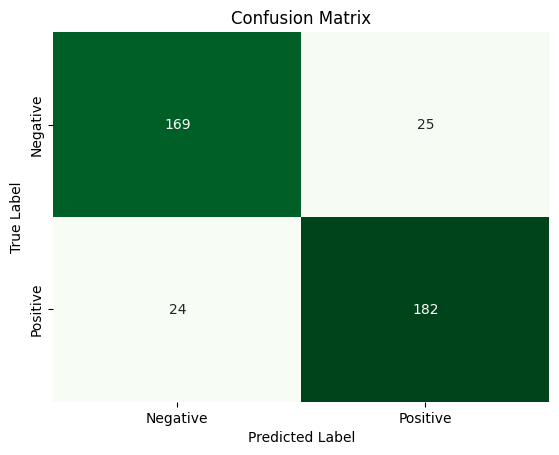


Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.87      0.87       194
    Positive       0.88      0.88      0.88       206

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400


Enter a movie review for sentiment analysis (or type 'exit' to quit): not fine

The sentiment is: Positive

Enter a movie review for sentiment analysis (or type 'exit' to quit): fine

The sentiment is: Positive

Enter a movie review for sentiment analysis (or type 'exit' to quit): nest

The sentiment is: Negative

Enter a movie review for sentiment analysis (or type 'exit' to quit): best movie

The sentiment is: Positive

Enter a movie review for sentiment analysis (or type 'exit' to quit): worst movie

The sentiment is: Negative

Enter a movie review for sentiment analysis (or type 'exit' to quit): fine movie

The sentiment is: Positive

E

In [ ]:
import nltk
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import movie_reviews, stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Download required NLTK datasets
nltk.download('movie_reviews')
nltk.download('stopwords')

# Load the movie reviews dataset
docs = [(movie_reviews.raw(fileid), category)
        for category in movie_reviews.categories()
        for fileid in movie_reviews.fileids(category)]

# Shuffle the dataset for randomness
random.shuffle(docs)

# Split data into text (X) and labels (y)
X = [doc[0] for doc in docs]  # Movie review texts
y = [1 if doc[1] == 'pos' else 0 for doc in docs]  # 1 = Positive, 0 = Negative

# Split into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text using TF-IDF
stop_words = list(stopwords.words('english'))  # Convert set to list
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=10000, sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

print("\nAccuracy Score:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# Display Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Function to predict sentiment of user input
def predict_sentiment(user_input):
    user_input_tfidf = tfidf.transform([user_input])
    prediction = model.predict(user_input_tfidf)
    sentiment = "Positive" if prediction == 1 else "Negative"
    print(f"\nThe sentiment is: {sentiment}")

# Interactive Loop for User Input
while True:
    user_review = input("\nEnter a movie review for sentiment analysis (or type 'exit' to quit): ")
    if user_review.lower() == 'exit':
        break
    predict_sentiment(user_review)
